### Human Resource Project to help curb employees leaving the company 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as matplot
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline


In [3]:
Hr_df = pd.read_csv('HR-data.csv')

### Inspect my data 

In [4]:
Hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
Hr_df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
Hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
Hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Data quality Check 

In [8]:
## Checking to see if there are any missing values or null values in my dataset 

Hr_df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

### Renaming my columns 

In [9]:
# Renaming certain columns for better readability

Hr_df = Hr_df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [10]:
Hr_df.head(2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


### Note: the Turnover means if the employee Stayed in the company or Left the company 

In [11]:
# Checking if there are any inconsistencies in my datatype 

Hr_df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

### EDA: Exploratory Data Analysis

####  ________________________________________________________________________________________________________

In [12]:
# checking my number of rolls and columns 
Hr_df.shape

(14999, 10)

In [13]:
# Calculate the turnover rate of our company's dataset. What's the rate of turnover? i.e the percentage 
turnover_rate = Hr_df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

From the percentage above i can see that only 23 percenyt of our employees have left the company in the last 5 years according to our data but then this percentage is a little bit low for our machine learning algorithm to learn from it so I will have to use some data wrnagling techniques to increas the percentage for me to increase the accuracy of my model 

In [14]:
# Getting the mean summary of turnover or people left versus people who stayed back in the company 
turnover_summary = Hr_df.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [15]:
turnover_summary.median()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.69,0.71,4,198,3,0,0
1,0.41,0.79,4,224,4,0,0


## Features Correlation 

##### Now I want to get the features that correlated with turnover the most to draw more insight from my data 

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


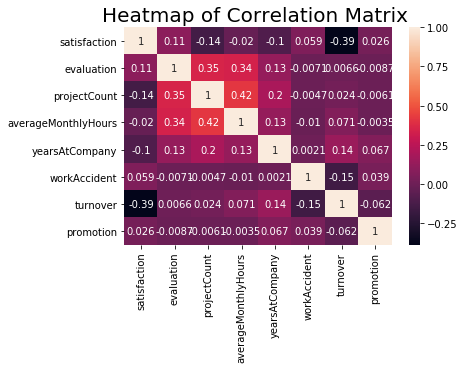

In [16]:
corr = Hr_df.corr()

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values, linecolor='white', annot = True)

plt.title('Heatmap of Correlation Matrix ', fontsize = 20)
corr

#### From the Heatmap above we can get a little insight on corroletion of features that led to more workers retention and what led to workers exiting the company 

________________________________________________________________________________________________________________

## EDA1

## Distribution of Satisfaction, Evaluation , and ProjectCount

Text(0, 0.5, 'Employee Count')

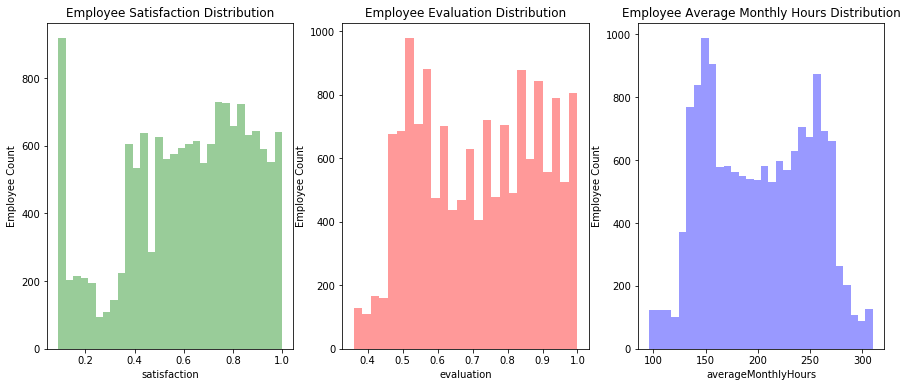

In [17]:
##  Plotting the distribution of Employee Satisfaction, Evaluation, and Project Count to derive insights 

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(Hr_df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(Hr_df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(Hr_df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')


## EDA 2

## Satisfaction VS Evaluation

### There are 3 distinct clusters for employees who left the company
Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

### Question: What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?
Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

### Question: Could this cluster mean employees who "under-performed"?
Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

### Question: Could this cluser mean that employees left because they found another job opportunity?

Text(0.5, 1, 'Visual Cluster of turnover')

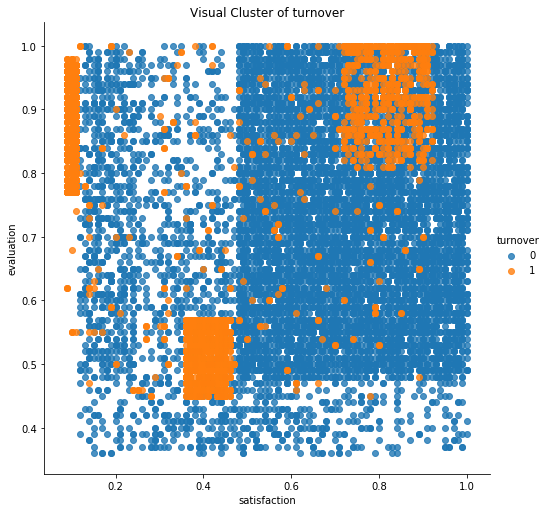

In [18]:

sns.lmplot(x = 'satisfaction', y = 'evaluation', data = Hr_df,
           fit_reg = False, # No Regression Line
           hue = 'turnover', height=7)

plt.title('Visual Cluster of turnover')          

## K-Means Cluster of Employee that Left (turnover)

________________________________________________________________________________________________________________________

### Explanation: 
Cluster 1(Blue):These are Hardworking and Sad Employees 

Cluster 2(Red): These are Not Hardworking and sad Employees
    
Cluster 3(green): These are Hardworking and Happy Employees  

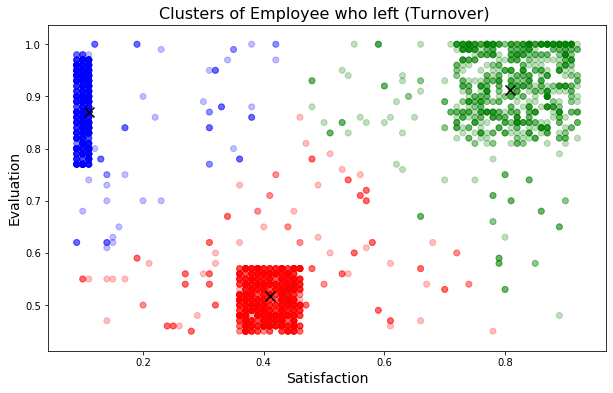

In [19]:
# Importing the Kmeans model 
from sklearn.cluster import KMeans

# Graphing and creating 3 clusters of employee turnover (cluster of our employees)
k_means = KMeans(n_clusters = 3, random_state = 2)

#Fitting the dataframe into the model 
k_means.fit(Hr_df[Hr_df.turnover == 1][['satisfaction', 'evaluation']])

# identifying the clusters with colors:
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in k_means.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x = 'satisfaction', y ='evaluation', data = Hr_df[Hr_df.turnover == 1], alpha = 0.25, color = kmeans_colors )

plt.xlabel('Satisfaction', fontsize= 14)
plt.ylabel('Evaluation', fontsize = 14)
# Center marker for my clusters:
plt.scatter(x = k_means.cluster_centers_[:,0], y = k_means.cluster_centers_[:,1], marker= 'x', color = 'black', s = 100 )
plt.title('Clusters of Employee who left (Turnover) ', fontsize = 16)
plt.show()




# EDA 3

#### There is a Tri-modal distribution for employees that turned-over

* Employees who had really low satisfaction levels **(0.2 or less)** left the company more
* Employees who had low satisfaction levels **(0.3~0.5)** left the company more
* Employees who had really high satisfaction levels **(0.7 or more)** left the company more

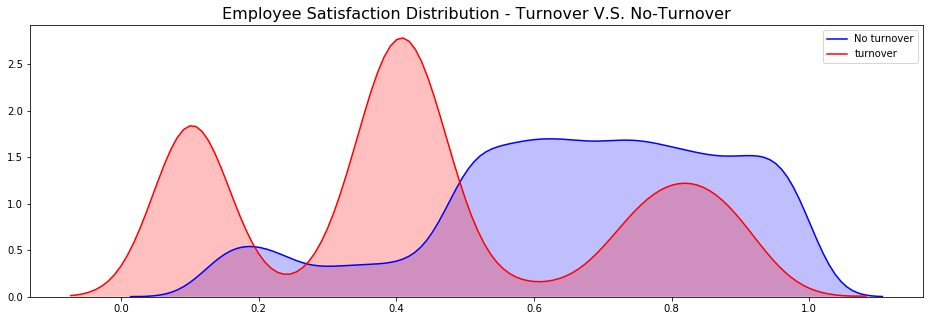

In [20]:
# KDEPlot Kernel Density Estimate Plot

fig = plt.figure(figsize = (16, 5))
ax = sns.kdeplot(Hr_df.loc[(Hr_df['turnover'] == 0), 'satisfaction' ], color = 'b', shade = True, label = 'No turnover')
ax = sns.kdeplot(Hr_df.loc[(Hr_df['turnover'] == 1), 'satisfaction'], color = 'r', shade = True, label = 'turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No-Turnover', fontsize = 16)
plt.show()

# EDA 4. Employee Project Count

Summary :

* More than half of the employees with **2,6, and 7** projects left the company
* Majority of the employees who did not leave the company had **3,4, and 5** projects
* All of the employees with **7** projects left the company
* There is an increase in employee turnover rate as **project count increases**

In [21]:
Hr_df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Getting a Bar CChart of this distribution 

[Text(0, 0.5, 'Percent')]

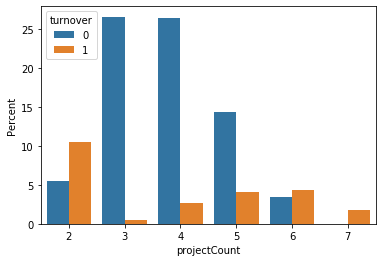

In [22]:
ax = sns.barplot(x = 'projectCount', y = 'projectCount', data = Hr_df, hue = 'turnover', estimator = lambda x: len(x) / len(Hr_df) * 100 )
ax.set(ylabel = 'Percent')



# EDA4 : Employee Department Distribution 

### Getting to know the distribution of employees in the data set  that satyed and those that left

In [23]:
hrleft = Hr_df[Hr_df['turnover'] == 1]

hrleft = pd.DataFrame(hrleft.department.value_counts()).reset_index()
hrstayed = pd.DataFrame(Hr_df.department.value_counts()).reset_index()

# Using SQL syntax to merge the two columns 

hr_merge = pd.merge(hrleft, hrstayed, how = 'inner', on = 'index')

hr_merge = hr_merge.rename(columns = {'department_x': 'left', 'department_y': 'stayed', 'index': 'department'} )

hr_merge

,department,left,stayed
0,sales,1014,4140
1,technical,697,2720
2,support,555,2229
3,IT,273,1227
4,hr,215,739
5,accounting,204,767
6,marketing,203,858
7,product_mng,198,902
8,RandD,121,787
9,management,91,630


## Another Bar Plot of distribution 

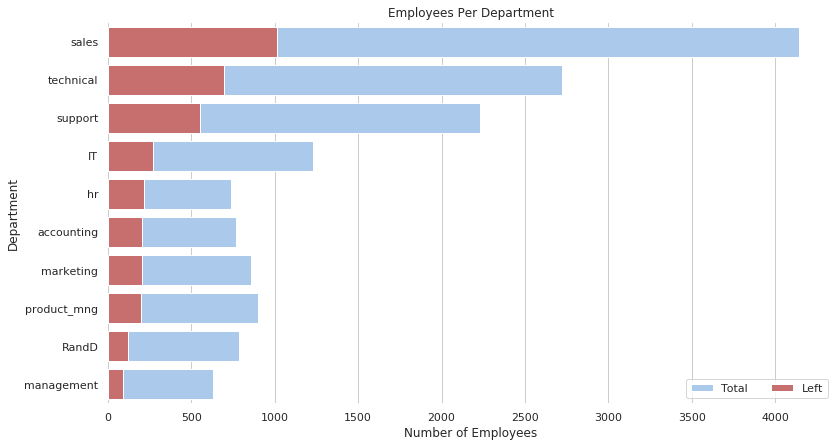

In [24]:
sns.set(style = "whitegrid")

# Initializing the matplotlib figure
f, ax = plt.subplots(figsize = (13, 7))

# Ploting the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x = "stayed", y = 'department', data = hr_merge,
            label = "Total", color = "b")

# Ploting the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x = "left", y = "department", data = hr_merge,
            label = "Left", color = "r")

# Adding a legend and informative axis label
ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set( ylabel = "Department", title = 'Employees Per Department',
       xlabel = "Number of Employees")
sns.despine(left = True, bottom = True)

## EDA 5   Getting insights on Hours of Work 

**Summary :** 
    
    * A bi-modal distribution for employees that turnovered
    * Employees who had less hours of work (~150 hours or less) left the company more
    * Employees who had too many hours of work (~250 or more) left the company
    * Employees who left generally were underworked or overworked.

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

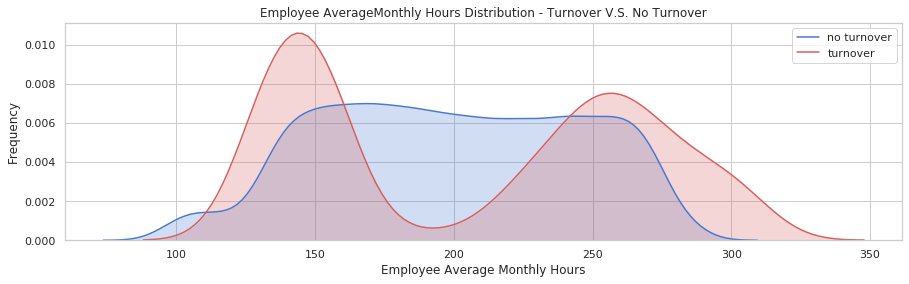

In [25]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(Hr_df.loc[(Hr_df['turnover'] == 0),'averageMonthlyHours'] , color ='b',shade = True, label = 'no turnover')
ax = sns.kdeplot(Hr_df.loc[(Hr_df['turnover'] == 1),'averageMonthlyHours'] , color ='r',shade = True, label = 'turnover')
ax.set(xlabel = 'Employee Average Monthly Hours', ylabel = 'Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

## EDA 6  Getting insights on Years employee have stayed in the company 

**Summary:** 
* First we notice that people who have stayed longer than **6 years** have minimum turnover
* The highest turnover rate is around **5 years** 

Text(0.5, 1.0, 'Years At The Company - Turnover V.S. No Turnover')

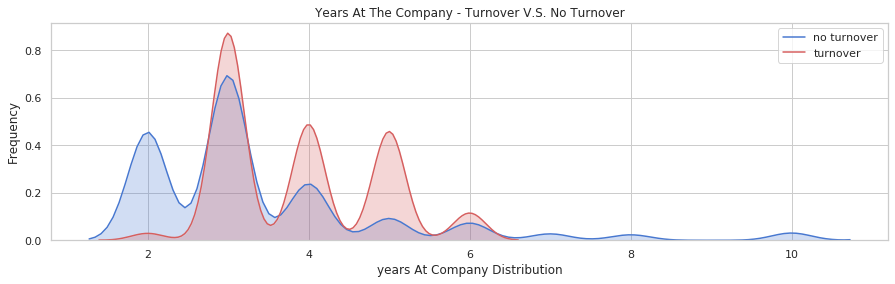

In [26]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(Hr_df.loc[(Hr_df['turnover'] == 0),'yearsAtCompany'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(Hr_df.loc[(Hr_df['turnover'] == 1),'yearsAtCompany'] , color='r',shade=True, label='turnover')
ax.set(xlabel='years At Company Distribution', ylabel='Frequency')
plt.title('Years At The Company - Turnover V.S. No Turnover')

## Time for Standard Pre-processing 

* I will be applying the **get_dummies()** method to the categorical variables
* and will also be seperate the categorical variables and numerical variables and combine them

In [27]:
# putting the variables inplace
cat_var = ['department','salary','turnover','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany','workAccident']

# Lets get dummies on our categorical variables
categorical_df = pd.get_dummies(Hr_df[cat_var], drop_first = True )
numerical_df = Hr_df[num_var]

#Placing it itno a new dataframe 
new_df = pd.concat([categorical_df,numerical_df], axis = 'columns')
new_df.head()



,turnover,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0


## How Balance is my Data Class?

### Checking for class imbalance shows that turnover rate is 24% 

In [28]:
Hr_df.turnover.value_counts(1)

0    0.761917
1    0.238083
Name: turnover, dtype: float64

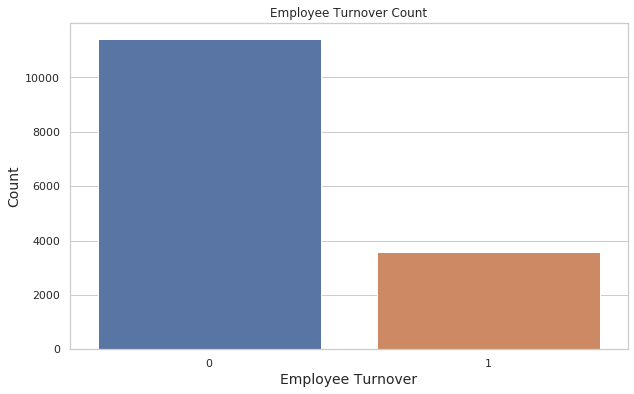

In [29]:
#Plotting a ba chart figure for this 
plt.figure(figsize = (10,6))
turnover = Hr_df.turnover.value_counts()
sns.barplot(y = turnover.values, x = turnover.index, alpha = 1)
plt.title("Employee Turnover Count")
plt.xlabel('Employee Turnover' ,fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

## Splitting and Training DataSet

There is a data imbalance in my data the number of turnover is quite low, so I want to use two diffrent techinques 
to reduce the imbalance to a bearable size so I can get good result when my model is trained. 
The methods I will be adopting include:
* Oversampling or SMOTE method
* Undersampling or RandomUnderSampler

In [30]:
# First I import the Sklearn Train Test split Library:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

#Creating the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Time to Train and Test the data set afterdefining 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 123, stratify = y)

## Resampling Methods 

I will be training with logistic regression with three types of sampling to see which gives the best result 
* **Upsampling Data**
* **Original Sampling** 
* **Downsampling Data**


**SMOTE** : Synthetic Minority OverSampling Technique 

In [32]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace = True,
                                n_samples = X_train[y_train == 0].shape[0],
                                random_state = 1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape, '\n')
print("Upsampled shape:", X_train_u.shape, y_train_u.shape, '\n')
print ("SMOTE sample shape:", X_train_sm.shape, y_train_sm.shape, '\n')
print("Downsampled shape:", X_train_d.shape, y_train_d.shape, '\n')

Original shape: (11999, 18) (11999,) 

Upsampled shape: (18284, 18) (18284,) 

SMOTE sample shape: (18284, 18) (18284,) 

Downsampled shape: (5714, 18) (5714,) 



## Finding which sampling technique to use for my Model  

### Applying 5-Fold Crossvalidation for Logistic Regression 

**My Objective** : Train my Logistic Regression Model on my Original, Upsampled and DownSampled dataset  

### First Let me explain what each term mean 

**ORIGINAL :** Here I will be using my original data 

**UPSAMPLED :** Here I randomly resample the minority class to create new data 

**SMOTE :** Here I use the nearest neighbours of the minority class to produce a new synthetic data 

**DOWNSAMPLED :** Here I remove some samples of the majority class   

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Creating the Original, Upsampled and Downsampled dataset and placing them in a dictionary like folder

methods_data = { "Original" : (X_train, y_train ),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE": (X_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d) }

# I will loop through the training set and apply 5-fold cross validation using LogisticRegression 
# By default the Cross_Val_Score StratifiedCV is used 

for method in methods_data.keys():
    LR_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv = 5, scoring = 'f1')
    print (f"The Best F1 Score for {method} data is :")
    print(LR_results.mean(), '\n')
    
cross_val_score(LogisticRegression(class_weight = 'balanced'), X_train, y_train, cv = 5, scoring= 'f1').mean()

The Best F1 Score for Original data is :
0.4496346788932494 

The Best F1 Score for Upsampled data is :
0.7793364543526724 

The Best F1 Score for SMOTE data is :
0.7880562801129458 

The Best F1 Score for Downsampled data is :
0.7785231984040071 



0.6091127190611549

From the above we see that **SMOTE** has the best Perfomance with an F1 score of **78%**

## Training my Models:

I will be training my models with three diffrent methods:
    1. Logistic Regression
    2. Random Forest Classifier
    3. Gradient Boosting

_______________________________________________________________________________

## LOGISTIC REGRESSION MODEL:

### Using the SMOTE F1 score of 78% for my LogisticRegression Model 

In [34]:
# importing relevant libraries:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


# For Logistic Regression Model:
LR = LogisticRegression()

#fitiing the model 
LR_model = LR.fit(X_train_sm, y_train_sm)

print('\n\n ---- Logistic Regression Model ----')
LR_auc = roc_auc_score(y_test, LR.predict(X_test)) 

print('Logistic Regression AUC = %2.2f' % LR_auc )

LR2 = LR.fit(X_train_sm, y_train_sm)
print('\n Classification Report')
print(classification_report(y_test, LR.predict(X_test)))





 ---- Logistic Regression Model ----
Logistic Regression AUC = 0.78

 Classification Report
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.51      0.81      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



## Random Forest Model:

#### Applying 5-fold Cross_Validation for Reandom Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

rf_result = cross_val_score(RF, X_train_sm, y_train_sm, cv = 5, scoring = 'f1')

rf_result.mean()


0.9867230878106532

## Getting the Random Forest F1 Score:

In [36]:
from sklearn.metrics import roc_auc_score

# fitting the model
RF_model = RF.fit(X_train_sm, y_train_sm)


print('\n\n -----Random Forest Model------')
rf_auc = roc_auc_score(y_test, RF.predict(X_test))

print('Random Forest AUC = %2.2f' % rf_auc)


# Printing the classification report 
print('\n Classification Report:')
print(classification_report(y_test, RF.predict(X_test)))




 -----Random Forest Model------
Random Forest AUC = 0.99

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



# Gradient Boosting Classifier Model 

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()

GB_model = GB.fit(X_train_sm, y_train_sm)

GB_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Applying 5-Fold Cross Validation to Gradient Boosting  

In [38]:
gb_result = cross_val_score(GB, X_train_sm, y_train_sm, cv = 5, scoring = 'f1')
gb_result.mean()

0.9695902047111046

In [40]:
from sklearn.metrics import roc_auc_score

print('\n\n ------Gradient Bossting Model------')
gb_auc = roc_auc_score(y_test, GB.predict(X_test))
print('Gradient Boosting AUC %2.2f' % gb_auc, '\n')
print('Gradient boosting classification report ')
print(classification_report(y_test, GB.predict(X_test)))



 ------Gradient Bossting Model------
Gradient Boosting AUC 0.96 

Gradient boosting classification report 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.93      0.93       714

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [41]:
## Confusion Metrix LOgistic Regression

confusion_matrix(y_test, LR.predict(X_test))

array([[1723,  563],
       [ 134,  580]])

In [42]:
# Confusion Matric for Gradient Boosting
confusion_matrix(y_test, GB.predict(X_test))

array([[2237,   49],
       [  47,  667]])

In [44]:
#Confusion Matrics for Random Forest

confusion_matrix(y_test, RF.predict(X_test))

array([[2273,   13],
       [  16,  698]])

# Recall or Precision 

It depends on how much cost/weight I want on my two types of errors: 

(1) False Positives or 

(2) False Negatives

What's the cost of having a FN and FP?

 **I Optimize Recall When:**

* I want to limit false negatives
* I will get more False Positives
* FN > FP

Example: Predicting Cancer Patients or
Credit Card Fraud

**I Optimize Precision When:**

* I want to limit false positives
* FP > FN

Example: Spam VS Not Spam, 




# Random Forest Feature Importances 

In [46]:
# To get the features that is most likly the cause as tol why many emplyee turnover or left 

feature_importances = pd.DataFrame(RF.feature_importances_, index = X_train.columns, 
                                   columns= ['importance']).sort_values('importance', ascending = False)

feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction,0.264147
1,yearsAtCompany,0.228323
2,averageMonthlyHours,0.173671
3,projectCount,0.153779
4,evaluation,0.112874
5,workAccident,0.018190
6,salary_low,0.011219
7,salary_medium,0.008142
8,department_technical,0.007444
9,department_sales,0.005335


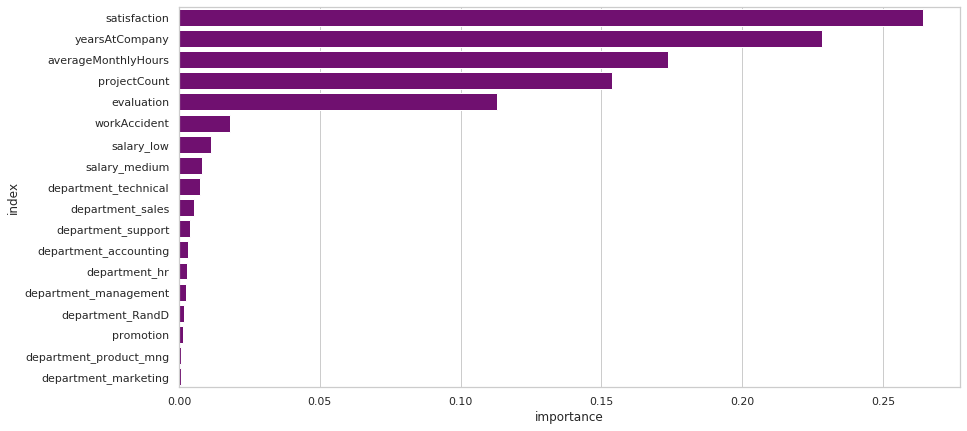

In [51]:
# Let me Plot the graph for visulalization purposes 
sns.set(style = 'whitegrid')

#initializing the matplotblib figure
f, ax = plt.subplots(figsize = (14, 7))

# Plotting the feature importances
sns.set_color_codes('pastel')
sns.barplot(x = 'importance', y = 'index', data = feature_importances, 
           label = 'Total', color = 'purple')

#### From the above graph we can see the feature that has the most importance in affecting the employee turnover 

___________________________________________________________________________________________________

# Conclusion

**Binary Classification:** Turnover V.S. Non Turnover

**Instance Scoring:** Likelihood of employee responding to an offer/incentive to save them from leaving.

**Need for Application:** Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.

Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly.

**Solution 1:**

We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

**Solution 2:** 

Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:

* Be a good coach
* Empower the team and do not micromanage
* Express interest for team member success
* Have clear vision / strategy for team
* Help team with career development